In [1]:
import pandas as pd

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

In [3]:
df.head()

score_gross_description = df[['imdb_score', 'gross']].describe()
score_gross_description

,imdb_score,gross
count,178.000000,1.780000e+02
mean,8.294382,1.030402e+08
std,0.266960,1.242549e+08
min,8.000000,8.060000e+03
25%,8.100000,1.318510e+07
50%,8.200000,5.194371e+07
75%,8.475000,1.522436e+08
max,9.300000,6.232795e+08


In [9]:
import numpy as np
pelis_CN = df['director_name'] == 'Christopher Nolan'
df_pelis_CN = df[pelis_CN]
df_pelis_CN
nolan_mean = df_pelis_CN['imdb_score'].mean()
nolan_mean

8.6

In [11]:
directors = df.groupby('director_name').mean()['imdb_score']
type(directors)
rating = directors['Steven Spielberg']
rating

TypeError: agg function failed [how->mean,dtype->object]

In [13]:
non_usa = df['country_id'] != 1
mov_1960 = df['title_year'] > 1960
mov_miya = df['director_id'] == 46

miyazaki = df[non_usa & mov_1960 & mov_miya]
miyazaki

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
24,Spirited AwayÊ,46,4,PG,2001,8.6,10049886,125,4,Japan,46,Hayao Miyazaki
50,Princess MononokeÊ,46,4,PG-13,1997,8.4,2298191,134,4,Japan,46,Hayao Miyazaki
95,Howl's Moving CastleÊ,46,4,PG,2004,8.2,4710455,119,4,Japan,46,Hayao Miyazaki


In [15]:
df.head()
pivot_agg = pd.pivot_table(df, index=['country', 'director_name'], values=['imdb_score'], aggfunc=['median'])
pivot_agg

median
                                  imdb_score
country      director_name                  
Argentina    Juan Jose Campanella       8.20
Australia    George Miller              8.10
Brazil       Fernando Meirelles         8.70
             Jose Padilha               8.10
Canada       Denis Villeneuve           8.20
...                                      ...
USA          Tony Scott                 8.00
             Victor Fleming             8.15
             Wes Anderson               8.10
             Woody Allen                8.10
West Germany Wolfgang Petersen          8.40

[125 rows x 1 columns]

In [17]:
df[df['movie_title'] == 'Gladiator']
gladiator_duration = df[df['movie_title'] == 'Gladiator']['duration']
gladiator_duration

Series([], Name: duration, dtype: int64)

In [19]:

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')

df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

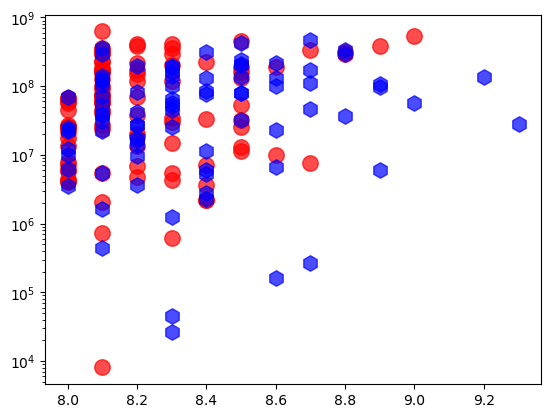

In [21]:
import matplotlib.pyplot as plt1

df_after_2000 = df[df['title_year'] >= 2000]
df_before_2000 = df[df['title_year']<2000]

plt1.scatter(
    df_after_2000['imdb_score'], df_after_2000['gross'],
    marker = 'o',
    color = 'r',
    alpha = 0.7,
    s = 124,
    label = ['Movies after 2000']
)

plt1.scatter(
    df_before_2000['imdb_score'], df_before_2000['gross'],
    marker = 'h',
    alpha = 0.7,
    color = 'b',
    s = 124,
    label = ['Movies before 2000']
)



axes = plt1.gca()
axes.set_yscale('log')

plt1.show()

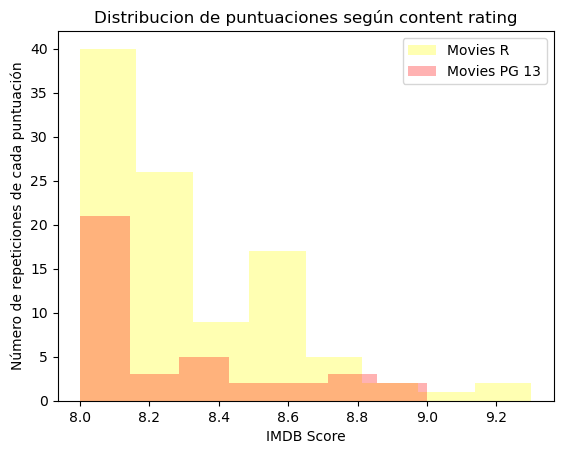

In [23]:
import matplotlib.pyplot as plt2

df_R = df[df['content_rating'] == 'R']
df_PG13 = df[df['content_rating'] == 'PG-13']
df_R
df_PG13
score_R = df_R['imdb_score']
score_PG13 = df_PG13['imdb_score']

plt2.hist(
    score_R,
    alpha = 0.3,
    color = 'yellow',
    label = 'Movies R',
    bins = 'auto'
)

plt2.hist(
    score_PG13,
    alpha = 0.3,
    color = 'red',
    label = 'Movies PG 13',
    bins = 'auto'
)

plt2.xlabel('IMDB Score')
plt2.ylabel('Número de repeticiones de cada puntuación')

plt2.legend(loc = 'best')

plt2.title('Distribucion de puntuaciones según content rating')

plt2.show() 